# **Data Preparation**
### Download data from kaggle ASL Alphabet (https://www.kaggle.com/datasets/grassknoted/asl-alphabet)


In [2]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
api_token = {"username":"jinhonghuo","key":"1c2306f3c60bd2f367e81229833d7fd4"}
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:46<00:00, 24.9MB/s]
100% 1.03G/1.03G [00:46<00:00, 23.7MB/s]


In [3]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

# import Tensorflow and check available GPU

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load data into training set and validation set

In [5]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  'asl_alphabet_train/asl_alphabet_train',
  validation_split=0.2,
  subset="both",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

train_ds_repeat = train_ds.repeat()

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Using 17400 files for validation.


In [6]:
train_ds.class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

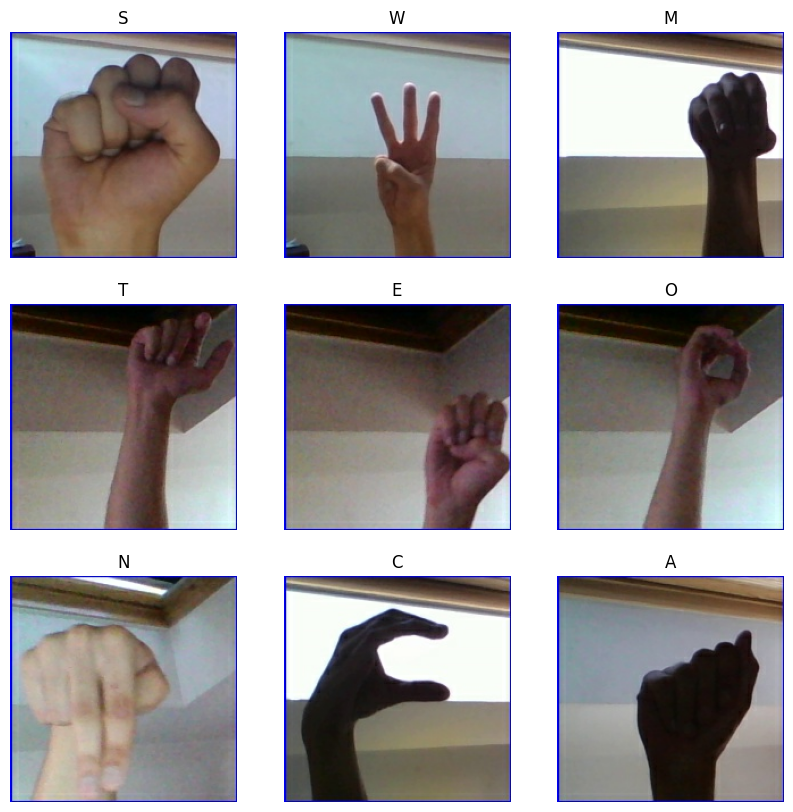

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        1

In [11]:
history = model.fit(
    train_ds_repeat,
    steps_per_epoch=100,
    epochs=40,
    validation_data=val_ds,
    validation_steps=8)

Epoch 1/40
100/100 [==============================] - 16s 36ms/step - loss: 3.3231 - accuracy: 0.0725 - val_loss: 3.1196 - val_accuracy: 0.1211
Epoch 2/40
100/100 [==============================] - 3s 34ms/step - loss: 2.3389 - accuracy: 0.3016 - val_loss: 1.8388 - val_accuracy: 0.3945
Epoch 3/40
100/100 [==============================] - 4s 42ms/step - loss: 1.3567 - accuracy: 0.5663 - val_loss: 0.8952 - val_accuracy: 0.7031
Epoch 4/40
100/100 [==============================] - 3s 32ms/step - loss: 0.8992 - accuracy: 0.7031 - val_loss: 0.6313 - val_accuracy: 0.8008
Epoch 5/40
100/100 [==============================] - 3s 32ms/step - loss: 0.6795 - accuracy: 0.7731 - val_loss: 0.4664 - val_accuracy: 0.8203
Epoch 6/40
100/100 [==============================] - 4s 35ms/step - loss: 0.5217 - accuracy: 0.8256 - val_loss: 0.4410 - val_accuracy: 0.8398
Epoch 7/40
100/100 [==============================] - 6s 56ms/step - loss: 0.4554 - accuracy: 0.8462 - val_loss: 0.2457 - val_accuracy: 0.921

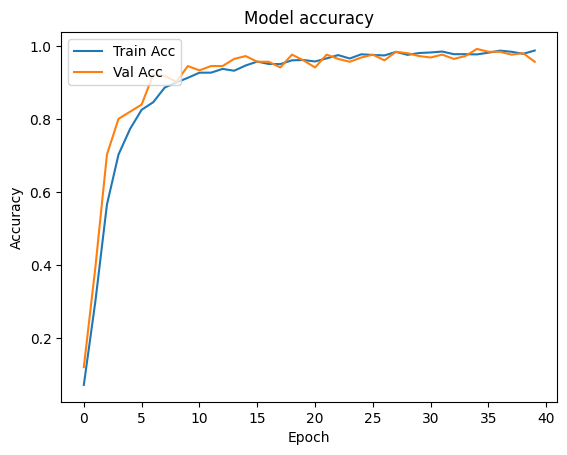

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Acc', 'Val Acc'], loc='upper left')
plt.show()

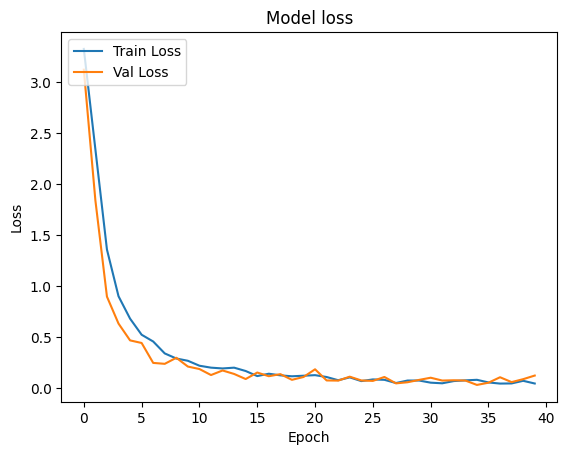

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Val Loss'], loc='upper left')
plt.show()